In [271]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [272]:
import sklearn
from sklearn.linear_model import LinearRegression
#rom sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LassoLars

from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [273]:
def get_ranks(good_df,ypred):
    cutoff=0.2
    #print (codedata,ypred,ydata)
    #print (len(ypred),len(good_df.mm.to_list()))
    d = {'code':good_df.code.to_list(),'pred':ypred,
         "dockQ":good_df.dockQ.to_list(),"params":good_df.params.to_list(),
        "mm":good_df.mm.to_list()}
    res_df=pd.DataFrame(d).sort_values("pred")
    #res_df.sort_values("CODE")

    i=0
    sumdiff=0
    mmdiff=0
    correct=0
    for code in res_df.code.unique():
        topranked=res_df.loc[res_df.code==code].sort_values("pred")["dockQ"][-1:].max()
        best=res_df.loc[res_df.code==code]["dockQ"].max()
        mmtop=res_df.loc[res_df.code==code].sort_values("pred")["mm"][-1:].max()
        mmbest=res_df.loc[res_df.code==code]["mm"].max()
        #print (code,topranked,best)
        if best>cutoff:
            i+=1
            sumdiff+=best-topranked
            mmdiff+=mmbest-mmtop
            if topranked>cutoff:
                correct+=1
    #print (i,correct,round(sumdiff/i,3))            
    return (i,correct,sumdiff,mmdiff)

In [274]:
reg = LinearRegression()
#reg=RandomForestClassifier(n_estimators=10)
#reg=LassoLars(alpha=.1)
#reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#reg=TheilSenRegressor(random_state=42)
#reg=RANSACRegressor(random_state=42)
#reg=HuberRegressor()

In [275]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")
df=df.dropna()
#df.JHparams.unique()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [276]:
sns.set(style="whitegrid")

In [277]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [278]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [279]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,medpdb,longpdb,avprob,auc,evalue,seqid,rank,code,CODE,params
0,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485.0,2034.0,1026.0,0.298,0.222,...,178.0,828.0,0.108,0.40,9999.0,0.000,1,1ay7,1ay7,trRosetta
1,1ay7_u2_A-1ay7_u1_A,trRosetta,90,97,1060.0,2034.0,1485.0,989.0,0.239,0.250,...,188.0,771.0,0.112,0.36,9999.0,0.000,2,1ay7,1ay7,trRosetta
2,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484.0,2034.0,654.0,0.223,0.120,...,187.0,838.0,0.096,0.46,4.3,50.000,1,1b27,1b27,trRosetta
3,1b27_u2_A-1b27_u1_A,trRosetta,90,109,733.0,2034.0,1484.0,656.0,0.229,0.160,...,219.0,922.0,0.099,0.46,4.3,50.000,2,1b27,1b27,trRosetta
4,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880.0,23051.0,5071.0,0.000,0.000,...,157.0,1028.0,0.020,0.00,9999.0,0.000,1,1bdj,1bdj,trRosetta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,3100.0,1781.0,11.0,0.055,0.000,...,75.0,570.0,0.136,0.00,9999.0,0.000,1,4y5o,4y5o,trRosetta
12017,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,9290.0,38386.0,12.0,0.048,0.000,...,158.0,615.0,0.160,0.09,9999.0,0.000,1,4zfr,4zfr,trRosetta
12018,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,13553.0,45450.0,79.0,0.009,0.000,...,332.0,2118.0,0.195,0.00,236.0,66.667,1,5brr,5brr,trRosetta
12019,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,30621.0,309307.0,7.0,0.011,0.000,...,412.0,2031.0,0.220,0.00,197.0,33.333,1,5cec,5cec,trRosetta


In [280]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [281]:
df.loc[df.JHparams=="N1-N3-new"]

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,medpdb,longpdb,avprob,auc,evalue,seqid,rank,code,CODE,params
3963,1ay7_u1_A-1ay7_u2_A,N1-N3-new,97,90,1060.0,1485.0,2034.0,986.0,0.287,0.250,...,178.0,828.0,0.108,0.40,9999.0,0.000,1,1ay7,1ay7,N1-N3-new
3964,1b27_u1_A-1b27_u2_A,N1-N3-new,109,90,733.0,1484.0,2034.0,654.0,0.174,0.100,...,187.0,838.0,0.096,0.46,4.3,50.000,1,1b27,1b27,N1-N3-new
3965,1bvn_u1_A-1bvn_u2_A,N1-N3-new,496,75,95.0,52623.0,123.0,85.0,0.195,0.179,...,195.0,681.0,0.156,0.00,2.3,31.250,1,1bvn,1bvn,N1-N3-new
3966,1ewy_u2_A-1ewy_u1_A,N1-N3-new,99,304,4396.0,25024.0,63406.0,3926.0,0.011,0.000,...,732.0,3170.0,0.040,0.00,20.0,75.000,2,1ewy,1ewy,N1-N3-new
3967,1g6v_u2_A-1g6v_u1_A,N1-N3-new,127,258,382.0,236528.0,8807.0,281.0,0.000,0.000,...,705.0,2857.0,0.042,0.00,1.1,27.500,2,1g6v,1g6v,N1-N3-new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,4kyi_u1_A-4kyi_u2_A,N1-N3-new,561,166,28.0,44524.0,224470.0,18.0,0.010,0.000,...,383.0,1724.0,0.239,0.00,44.0,22.892,1,4kyi,4kyi,N1-N3-new
4044,4o4b_u1_A-4o4b_u2_A,N1-N3-new,389,247,91.0,78377.0,5105.0,87.0,0.028,0.049,...,536.0,2464.0,0.144,0.00,145.0,100.000,1,4o4b,4o4b,N1-N3-new
4045,4rf0_u1_A-4rf0_u2_A,N1-N3-new,320,77,1.0,182.0,38383.0,1.0,0.012,0.000,...,159.0,636.0,0.209,0.00,51.0,60.000,1,4rf0,4rf0,N1-N3-new
4046,4xhu_u1_A-4xhu_u2_A,N1-N3-new,352,95,410.0,8381.0,307.0,240.0,0.265,0.204,...,122.0,705.0,0.109,0.00,17.0,22.222,1,4xhu,4xhu,N1-N3-new


In [282]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[(df.JHparams.isin(pdbset))&(~df.JHparams.isin(["pdbconfold"]))].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,medpdb,longpdb,avprob,auc,evalue,seqid,rank,code,CODE,params
7875,1ay7_u1_A-1ay7_u2_A,PDB,97,90,0.0,0.0,0.0,0.0,0.884,0.722,...,0.0,0.0,0.0,0.01,9999.0,0.000,1,1ay7,1ay7,PDB
7876,1ay7_u2_A-1ay7_u1_A,PDB,90,97,0.0,0.0,0.0,0.0,0.929,0.833,...,0.0,0.0,0.0,0.09,9999.0,0.000,2,1ay7,1ay7,PDB
7877,1b27_u1_A-1b27_u2_A,PDB,109,90,0.0,0.0,0.0,0.0,0.861,0.740,...,0.0,0.0,0.0,0.01,4.3,50.000,1,1b27,1b27,PDB
7878,1b27_u2_A-1b27_u1_A,PDB,90,109,0.0,0.0,0.0,0.0,0.887,0.780,...,0.0,0.0,0.0,0.08,4.3,50.000,2,1b27,1b27,PDB
7879,1bdj_u1_A-1bdj_u2_A,PDB,129,118,0.0,0.0,0.0,0.0,0.790,0.882,...,0.0,0.0,0.0,0.00,9999.0,0.000,1,1bdj,1bdj,PDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10575,4k0v_u1_A-4k0v_u2_A.pdb-starting,PDB,424,218,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.08,144.0,42.857,1,4k0v,4k0v,PDB
10576,4rf0_u1_A-4rf0_u2_A.pdb-starting,PDB,320,77,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.05,51.0,60.000,1,4rf0,4rf0,PDB
10577,4rf0_u1_A-4rf0_u2_A.pdb-step1,PDB,320,77,0.0,0.0,0.0,0.0,0.220,0.556,...,0.0,0.0,0.0,0.05,51.0,60.000,1,4rf0,4rf0,PDB
10578,4xhu_u1_A-4xhu_u2_A.pdb-starting,PDB,352,95,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.02,17.0,22.222,1,4xhu,4xhu,PDB


In [283]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [284]:
# Add a linear combination of trRosetta
r=re.compile(".*-N.*") # .*cpu.*
datasets=df.JHparams.unique()
JHsets=list(filter(r.match, datasets))



In [285]:
cutoff=0.1
goodmodels=df.loc[(df.dockQ>cutoff)&(df.JHparams.isin(JHsets))].code.unique()
good_df=df.loc[(df.code.isin(goodmodels))&(df.JHparams.isin(JHsets))] #.reset_index()
df.dockQ.dtypes

dtype('float64')

Text(0.5, 1.0, 'CC 0.237 Good: 0.5 Loss: 0.138 , 0.224 Test: 12')

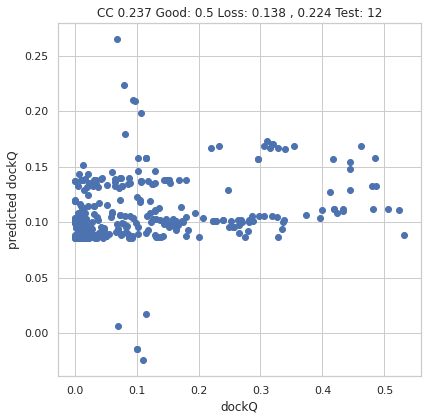

In [286]:
ydata=good_df.dockQ

#cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]
reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [287]:
xdata=df.loc[df.JHparams.isin(JHsets)][cols]
ypred = reg.predict(xdata)
df2=df.loc[df.JHparams.isin(JHsets)].reset_index()
df2.loc[:,'pred'] = ypred
topranked=pd.DataFrame(columns = df2.columns) 


In [288]:

for name in df2.name.unique():
    foo=df2.loc[df2.name==name].sort_values("pred")[-1:].max()
    #print(foo)
    foo_df=pd.DataFrame(foo).transpose()
    #print (foo_df)
    topranked=pd.concat([topranked,foo_df], ignore_index=True)
topranked["JHparams"]="JHranked"
topranked.params="JHranked"
topranked=topranked.drop(["pred","index"],axis=1)
topranked.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [289]:
df.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [290]:
df=pd.concat([df,topranked], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [291]:
df

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,medpdb,longpdb,avprob,auc,evalue,seqid,rank,code,CODE,params
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060,1485,2034,1026,0.298,0.222,...,178,828,0.108,0.4,9999,0,1,1ay7,1ay7,-N 3 --cpu 8
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060,2034,1485,989,0.239,0.25,...,188,771,0.112,0.36,9999,0,2,1ay7,1ay7,-N 3 --cpu 8
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733,1484,2034,654,0.223,0.12,...,187,838,0.096,0.46,4.3,50,1,1b27,1b27,-N 3 --cpu 8
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733,2034,1484,656,0.229,0.16,...,219,922,0.099,0.46,4.3,50,2,1b27,1b27,-N 3 --cpu 8
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651,349880,23051,5071,0,0,...,157,1028,0.02,0,9999,0,1,1bdj,1bdj,-N 3 --cpu 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,5cec_u2_A-5cec_u1_A,JHranked,191,403,8,59695,200,7,0.05,0.075,...,1039,4734,0.226,0,197,33.333,2,5cec,5cec,JHranked
28213,5cra_u1_A-5cra_u2_A,JHranked,193,77,1,11,42026,1,0.008,0,...,148,595,0.179,0,9999,0,1,5cra,5cra,JHranked
28214,5cra_u2_A-5cra_u1_A,JHranked,77,193,1,42026,11,1,0.103,0,...,417,2052,0.181,0.17,9999,0,2,5cra,5cra,JHranked
28215,5eg3_u1_A-5eg3_u2_A,JHranked,303,105,499,560629,26558,278,0,0,...,221,893,0.046,0,68,40,1,5eg3,5eg3,JHranked


In [292]:
#df["rank"].str.isnumeric().unique()
#df.dtypes

In [293]:
# We need to check that everything is numeric
cols=['name', 'JHparams', 'seqid',      'rank']

#for d in df.columns.values.tolist():
for d in ["rank","len"]:
    if d=="name": continue
    if d=="JHparams": continue
    print (d)
    #print (df.loc[(df[d].str.isnumeric()!=True)][cols+[d]])
    #print (df.loc[(df[d].str.isnumeric()][d].unique()
    #print (df[d].str.isnumeric().unique())

rank
len


In [294]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

AssertionError: 

In [295]:
df.columns.values.tolist()

['name',
 'JHparams',
 'lenA',
 'lenB',
 'msa',
 'msaA',
 'msaB',
 'cdhit',
 'dockQ',
 'fnat',
 'iRMS',
 'LRMS',
 'fnonnat',
 'mm',
 'tmA',
 'tmB',
 'long',
 'med',
 'longPPV',
 'medPPV',
 'longA',
 'medA',
 'longPPVA',
 'medPPVA',
 'longB',
 'medB',
 'longPPVB',
 'medPPVB',
 'short',
 'shortPPV',
 'shortA',
 'shortPPVA',
 'shortB',
 'shortPPVB',
 'shortpdb',
 'medpdb',
 'longpdb',
 'avprob',
 'auc',
 'evalue',
 'seqid',
 'rank',
 'code',
 'CODE',
 'params',
 'tmAB',
 'msaAB',
 'tmAB_max',
 'msaAB_max',
 'tmAB_min',
 'msaAB_min',
 'numcorrect',
 'len']

In [296]:
cols=['name', 'JHparams', 'seqid',      'rank']
      
d="TMdock-nohomology"
#df.loc[df.JHparams==d].groupby(["code"])[cols].first()

df.loc[(df.JHparams==d) & ((df["rank"].str.isnumeric()!=True))][cols]
#df.loc[(df.JHparams==d)]["rank"].str.isnumeric()
#df.loc[(df.JHparams==d)] 
      
      

,name,JHparams,seqid,rank
15586,1bdj_u1_A-1bdj_u2_A,TMdock-nohomology,0,3
15587,1bdj_u1_A-1bdj_u2_A,TMdock-nohomology,0,4
15588,1bdj_u1_A-1bdj_u2_A,TMdock-nohomology,0,5
15589,1bdj_u1_A-1bdj_u2_A,TMdock-nohomology,0,6
15590,1bdj_u1_A-1bdj_u2_A,TMdock-nohomology,0,7
...,...,...,...,...
17738,5eg3_u1_A-5eg3_u2_A,TMdock-nohomology,5,0
17739,5eg3_u1_A-5eg3_u2_A,TMdock-nohomology,6,0
17740,5eg3_u1_A-5eg3_u2_A,TMdock-nohomology,7,0
17741,5eg3_u1_A-5eg3_u2_A,TMdock-nohomology,8,0


In [297]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    print (d)
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


-N 3 --cpu 8


confold


gramm


homodimer


ispred


-N 1 -E 1.e-100 --cpu 8


-N 1 -E 1.e-2 


N1-merged-pdb


N1-merged


N1-N3-merged-fast


N1-N3-new


N1-N3-multimerged


-N 1 -E 1.e-10 --cpu 8 


N1-top1000-merged


N1-top1000


N1-top100


N1-top2000


N1-top500


N3dock


-N 3 --incE 1.e-2


N3-merged


N3-multimerged


N3-newdockA


N3-newdockB


N3-newdockC


N5-newdockA


N5-newdockB


N5-newdockC


-N 5 --cpu 8


pdbconfold


pdbcontacts-new


pdbcontacts


PDBDOCK2


PDBDOCK3


PDBDOCK4


PDBDOCK


PDBNEWDOCK-standard


PDBNEWDOCK-standard--starting


PDBNEWDOCK-standard--step1


pdbnewcontacts


PDBNEWDOCK-A--dockB1


PDBNEWDOCK-A--dockB2


PDBNEWDOCK-A--dockB-relax


PDBNEWDOCK-A--dockC1


PDBNEWDOCK-A--dockC2


PDBNEWDOCK-A--dockC-relax


PDBNEWDOCK-A--dockD1


PDBNEWDOCK-A--dockD2


PDBNEWDOCK-A--dockD-relax


PDBNEWDOCK-A--starting


PDBNEWDOCK-A--step1


PDBNEWDOCK-A
PDBNEWDOCK-B--dockB1


PDBNEWDOCK-B--dockB2


PDBNEWDOCK-B--dockB-relax


PDBNEWDOCK-B--dockC1


PDBNEWDOCK-B--dockC2
PDBNEWDOCK-B--dockC-relax


PDBNEWDOCK-B--dockD1


PDBNEWDOCK-B--dockD2


PDBNEWDOCK-B--dockD-relax


PDBNEWDOCK-B--starting


PDBNEWDOCK-B--step1


PDBNEWDOCK-B
PDBNEWDOCK-C--dockB1


PDBNEWDOCK-C--dockB2


PDBNEWDOCK-C--dockB-relax


PDBNEWDOCK-C--dockC1


PDBNEWDOCK-C--dockC2


PDBNEWDOCK-C--dockC-relax


PDBNEWDOCK-C--dockD1


PDBNEWDOCK-C--dockD2


PDBNEWDOCK-C--dockD-relax


PDBNEWDOCK-C--starting


PDBNEWDOCK-C--step1


PDBNEWDOCK-C
PDBNEWDOCK-D--dockB1


PDBNEWDOCK-D--dockB2


PDBNEWDOCK-D--dockB-relax


PDBNEWDOCK-D--dockC1


PDBNEWDOCK-D--dockC2


PDBNEWDOCK-D--dockC-relax


PDBNEWDOCK-D--dockD1


PDBNEWDOCK-D--dockD2


PDBNEWDOCK-D--dockD-relax


PDBNEWDOCK-D--starting


PDBNEWDOCK-D--step1


PDBNEWDOCK-repulsion--starting


PDBNEWDOCK-repulsion--step1


PDBNEWDOCK-repulsion
rbh-jh


rbh-merged-pdb


rbh-merged


rbh


TMdock-nohomology-1.e-5


TMdock-double


TMdock-nohomology


AssertionError: 

In [298]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len


In [299]:
df.JHparams.unique()
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [300]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first

{'-N 3 --cpu 8': Empty DataFrame
 Columns: [name, JHparams, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, auc, evalue, seqid, rank, code, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len]
 Index: []
 
 [0 rows x 53 columns],
 'confold': Empty DataFrame
 Columns: [name, JHparams, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, auc, evalue, seqid, rank, code, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len]
 Index: []
 
 [0 rows x 53 columns],
 'gramm': Empty DataFrame
 Columns: [name, 

In [301]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [302]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0   
...                                           ...   ...   ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   499.0   

                                  msaA      msaB   cdhit  dockQ   fnat  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7     960.0     960.0     2.0  0.023  0.000   
                        1b27     272.0     272.0    34.0  0.019  0.000   
                        1bdj   29395.0   29395.0   124.0  0.024  0.000   
                        1buh  255874.0  255874.0   401.0  0.061  0.000   
                        1bvn    2041.0    2041.0     7.0  0.038  0.000   
...                                ...       ...     ...    ...    ...   
trRosetta               4zfr   42037.0   42037.0   504.0  0.048  0.000   
                        5brr   45636.0   45970.0   550.0  0.035  0.073   
                        5cec  312612.0  312612.0  1577.0  0.050  0.075   
                        5cra   42026.0   42026.0     1.0  0.103  0.000   
                        5eg3  565997.0  565997.0   279.0  0.016  0.000   

                                 iRMS  ...  CODE                   params  \
JHparams                code           ...                                  
-N 1 -E 1.e-10 --cpu 8  1ay7   15.615  ...  1ay7  -N 1 -E 1.e-10 --cpu 8    
                        1b27   99.396  ...  1b27  -N 1 -E 1.e-10 --cpu 8    
                        1bdj   17.785  ...  1bdj  -N 1 -E 1.e-10 --cpu 8    
                        1buh  491.316  ...  1buh  -N 1 -E 1.e-10 --cpu 8    
                        1bvn   19.311  ...  1bvn  -N 1 -E 1.e-10 --cpu 8    
...                               ...  ...   ...                      ...   
trRosetta               4zfr  291.376  ...  4zfr                trRosetta   
                        5brr  642.702  ...  5brr                trRosetta   
                        5cec  732.223  ...  5cec                trRosetta   
                        5cra   22.323  ...  5cra                trRosetta   
                        5eg3  542.531  ...  5eg3                trRosetta   

                                  tmAB     msaAB  tmAB_max  msaAB_max  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  0.468725     503.0   0.56969      960.0   
                        1b27  0.662735     158.0   0.66638      272.0   
                        1bdj  0.824210   14815.0   0.84941    29395.0   
                        1buh  0.650535  128775.0   0.72158   255874.0   
                        1bvn  0.313205    1023.5   0.33372     2041.0   
...                                ...       ...       ...        ...   
trRosetta               4zfr  0.862735   28229.0   0.90969    42037.0   
                        5brr  0.848585   29785.0   0.97832    45970.0   
                        5cec  0.782885  172839.5   0.86787   312612.0   
                        5cra  0.694590   21018.5   0.91652    42026.0   
                        5eg3  0.833605  295961.5   0.86145   565997.0   

                              tmAB_min  msaAB_min  numcorrect  len  
JHparams                code                                        
-N 1 -E 1.e-10 --cpu 8  1ay7   0.36776    

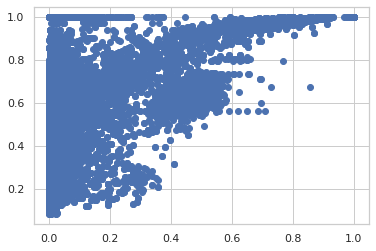

In [303]:

plt.scatter(df.dockQ,df.mm)


KeyError: 'PDB'

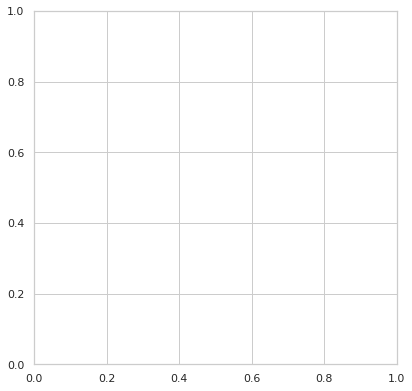

KeyError: 'PDB'

In [304]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")



KeyError: 'JHranked'

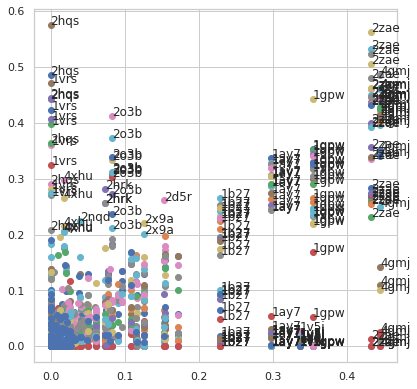

KeyError: 'JHranked'

In [305]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'JHranked'

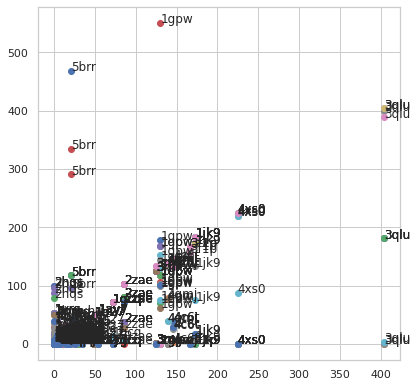

KeyError: 'JHranked'

In [306]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

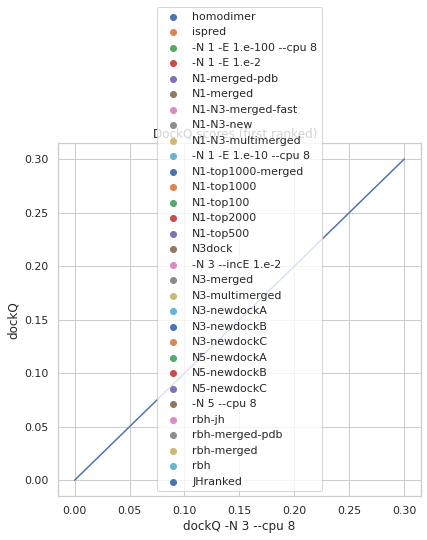

In [307]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'JHranked'

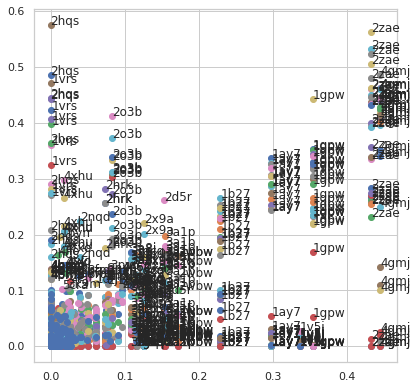

KeyError: 'JHranked'

In [308]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

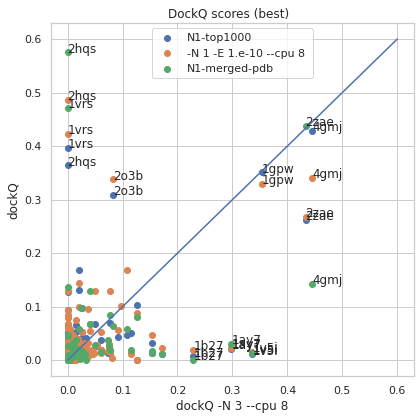

In [309]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [310]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK

KeyError: 'trRosetta'

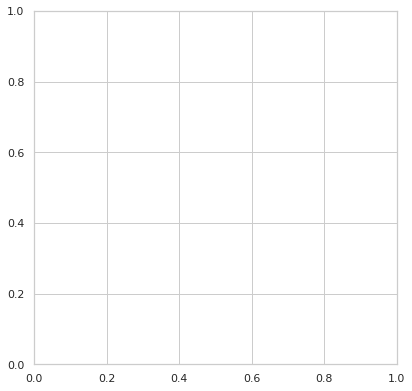

KeyError: 'trRosetta'

In [311]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'trRosetta'

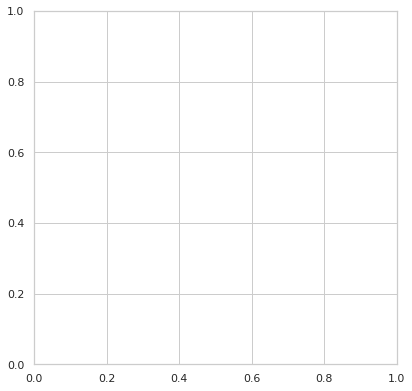

KeyError: 'trRosetta'

In [312]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [313]:
d="TMdock"
foo=pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
data_first[d].dockQ
foo[["dockQ_x","dockQ_y"]]
#cc=np.corrcoef(foo.dockQ_x,foo.dockQ_y)

foo.dockQ_y.isna().unique()
data_first[d].dockQ.isna().unique()

array([False])

No handles with labels found to put in legend.


TMdock
0 0


Text(3.200000000000003, 0.5, 'dockQ TMdock')

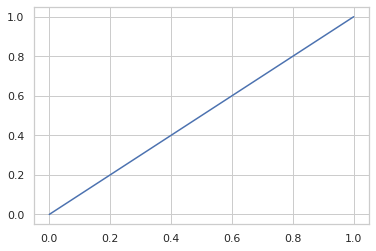

In [314]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    print(df_merged.dockQ_x.shape[0],df_merged.dockQ_y.shape[0])
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_x)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model) ") #, CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(3.200000000000003, 0.5, 'dockQ TMdock-nohomology')

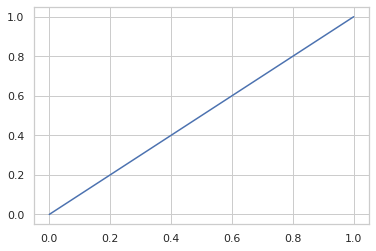

In [315]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    #cc=np.corrcoef(df_merged.dockQ_y,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

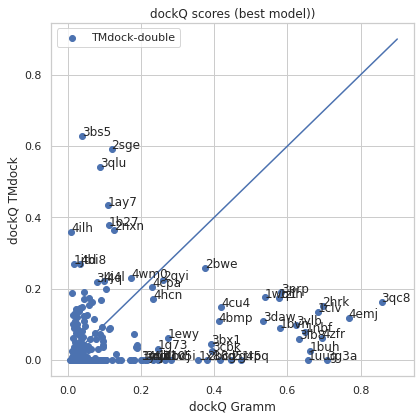

In [316]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'trRosetta'

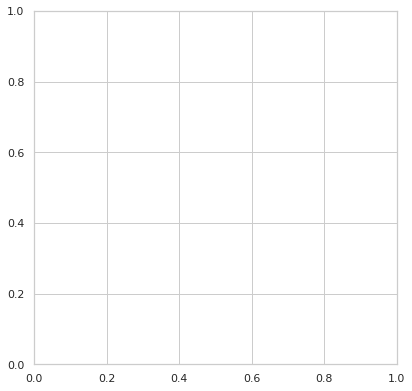

KeyError: 'trRosetta'

In [317]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [318]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB  msa  msaA  msaB  cdhit  \
JHparams      code                                                            
TMdock-double 3buz  3buz_u1_A-3buz_u2_A   412   364  0.0   0.0   0.0  0.014   
              4pj2  4pj2_u1_A-4pj2_u2_A   123   121  0.0   0.0   0.0  0.014   
              4pou  4pou_u1_A-4pou_u2_A   125   122  0.0   0.0   0.0  0.021   
              2gwf  2gwf_u1_A-2gwf_u2_A   158   135  0.0   0.0   0.0  0.030   
              2grx  2grx_u1_A-2grx_u2_A   708    91  0.0   0.0   0.0  0.024   
...                                 ...   ...   ...  ...   ...   ...    ...   
gramm         4zfr  4zfr_u1_A-4zfr_u2_A   186    77  0.0   0.0   0.0  0.000   
              2hrk  2hrk_u1_A-2hrk_u2_A   181   121  0.0   0.0   0.0  0.000   
              3g3a  3g3a_u1_A-3g3a_u2_A   166   130  0.0   0.0   0.0  0.000   
              4emj  4emj_u1_A-4emj_u2_A   403   106  0.0   0.0   0.0  0.000   
              3qc8  3qc8_u1_A-3qc8_u2_A   169    82  0.0   0.0   0.0  0.000   

                    dockQ    fnat     iRMS  ...  CODE         params  tmAB  \
JHparams      code                          ...                              
TMdock-double 3buz  0.000  47.346  102.160  ...  3buz  TMdock-double  38.5   
              4pj2  0.000  44.295   99.932  ...  4pj2  TMdock-double   0.5   
              4pou  0.000  23.333   69.147  ...  4pou  TMdock-double   0.5   
              2gwf  0.000  88.003  209.559  ...  2gwf  TMdock-double   0.5   
              2grx  0.000  57.328  136.023  ...  2grx  TMdock-double  46.5   
...                   ...     ...      ...  ...   ...            ...   ...   
gramm         4zfr  0.695   0.887    9.940  ...  4zfr          gramm   1.0   
              2hrk  0.696   0.978   13.721  ...  2hrk          gramm   1.0   
              3g3a  0.708   0.787   11.568  ...  3g3a          gramm   1.0   
              4emj  0.768   0.762    3.742  ...  4emj          gramm   1.0   
              3qc8  0.857   0.977   11.047  ...  3qc8          gramm   1.0   

                    msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams      code                                                    
TMdock-double 3buz    0.0      76.0        0.0       1.0        0.0   
              4pj2    0.0       1.0        0.0       0.0        0.0   
              4pou    0.0       1.0        0.0       0.0        0.0   
              2gwf    0.0       1.0        0.0       0.0        0.0   
              2grx    0.0      92.0        0.0       1.0        0.0   
...                   ...       ...        ...       ...        ...   
gramm         4zfr    0.0       1.0        0.0       1.0        0.0   
              2hrk    0.0       1.0        0.0       1.0        0.0   
              3g3a    0.0       1.0        0.0       1.0        0.0   
              4emj    0.0       1.0        0.0       1.0        0.0   
              3qc8    0.0       1.0        0.0       1.0        0.0   

                    numcorrect  len  
JHparams      code                   
TMdock-double 3buz         0.0  776  
              4pj2         0.0  244  
              4pou         0.0  247  
              2gwf         0.0  293  
              2grx         0.0  799  
...                        ...  ...  
gramm         4zfr         0.0  263  
              2hrk         0.0  302  
              3g3a         0.0  296  
              4emj         0.0  509  
              3qc8         0.0  251  

[652 rows x 51 columns]

In [319]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

61

In [320]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

14

In [321]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

39

In [322]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

15

In [323]:
len(df_merged["CODE"].unique())

218

In [324]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
15562,5eg3_u1_A-5eg3_u2_A,TMdock-double,303,105,0,0,0,0.014,0,19.742,...,5eg3,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0,408
14714,3oj4_u1_A-3oj4_u2_A,TMdock-double,151,77,0,0,0,0.012,0,22.105,...,3oj4,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0,228
14713,3oj4_u1_A-3oj4_u2_A,TMdock-double,151,77,0,0,0,0.004,0,34.351,...,3oj4,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0,228
14712,3oed_u1_A-3oed_u2_A,TMdock-double,295,131,0,0,0,0.016,0,19.962,...,3oed,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0,426
14711,3oed_u1_A-3oed_u2_A,TMdock-double,295,131,0,0,0,0.009,0,19.363,...,3oed,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14447,3bs5_u1_A-3bs5_u2_A,TMdock-double,84,76,0,0,0,0,0.539,0.9,...,3bs5,TMdock-double,1.0,0.0,1.0,0.0,1.0,0.0,34.196,160
14812,3qlu_u1_A-3qlu_u2_A,TMdock-double,384,374,0,0,0,0.398,0.542,3.667,...,3qlu,TMdock-double,3961.5,0.0,7922.0,0.0,1.0,0.0,31.752,758
14443,3bs5_u1_A-3bs5_u2_A,TMdock-double,84,76,0,0,0,0,0.56,0.7,...,3bs5,TMdock-double,1.0,0.0,1.0,0.0,1.0,0.0,34.196,160
14288,2sge_u1_A-2sge_u2_A,TMdock-double,186,57,0,0,0,0.364,0.593,3.624,...,2sge,TMdock-double,1.0,0.0,1.0,0.0,1.0,0.0,0,243


In [325]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,iRMS,LRMS,...,evalue,seqid,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
CODE,,,,,,,,,,,,,,,,,,,,,
3rj3,295.0,126.0,0.0,0.0,0.0,0.009,0.0000,0.048,155.5220,56.8270,...,9999.00,0.000,0.635370,0.0,1.00000,0.0,0.484270,0.0,0.000,421.0
1fle,241.0,58.0,0.0,0.0,0.0,0.026,0.0010,0.000,98.6520,57.9780,...,9999.00,0.000,0.674835,0.0,1.00000,0.0,0.459980,0.0,0.000,299.0
3oed,295.0,131.0,0.0,0.0,0.0,0.016,0.0010,0.000,186.2040,61.5420,...,74.00,66.667,0.630830,0.0,1.00000,0.0,0.504620,0.0,0.000,426.0
1pvh,209.0,160.0,0.0,0.0,0.0,0.018,0.0050,0.032,144.9540,24.1760,...,37.00,26.667,0.719055,0.0,1.00000,0.0,0.632150,0.0,0.000,369.0
3kld,384.0,265.0,0.0,0.0,0.0,0.023,0.0060,0.030,210.1270,73.1640,...,243.00,66.667,1.000000,0.0,1.00000,0.0,1.000000,0.0,0.000,649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1b27,109.0,90.0,0.0,0.0,0.0,0.000,0.2650,0.160,32.7470,74.6080,...,4.30,50.000,1.000000,0.0,1.00000,0.0,1.000000,0.0,49.025,199.0
1vrs,124.0,120.5,1045.5,50159.5,50159.5,989.000,0.2735,0.306,119.8405,249.2075,...,3.00,38.462,0.817912,25780.5,0.99644,50159.5,0.639385,1401.5,26.994,241.0
1v5i,276.0,78.0,0.0,0.0,0.0,0.061,0.2810,0.298,69.6880,58.4990,...,9999.00,0.000,1.000000,0.0,1.00000,0.0,1.000000,0.0,1.000,354.0


Text(0, 0.5, 'dockQ TMdock')

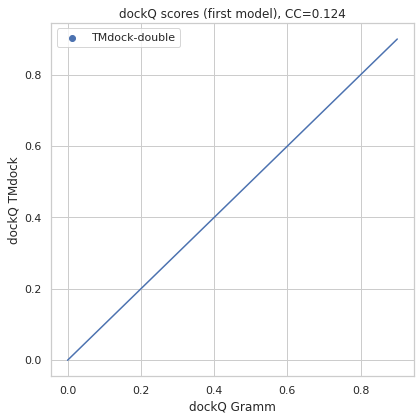

In [326]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'TMdock-nohomology'

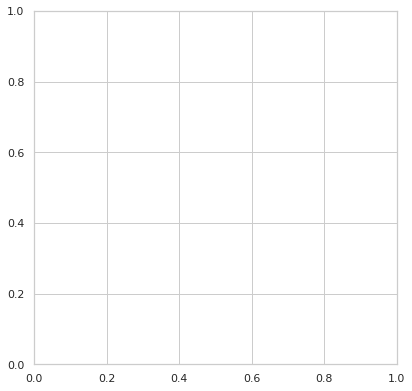

KeyError: 'TMdock-nohomology'

In [327]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'TMdock'

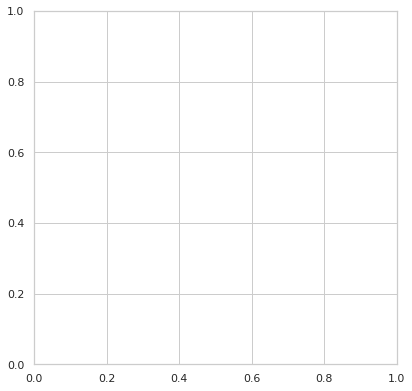

KeyError: 'TMdock'

In [328]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbconfold')

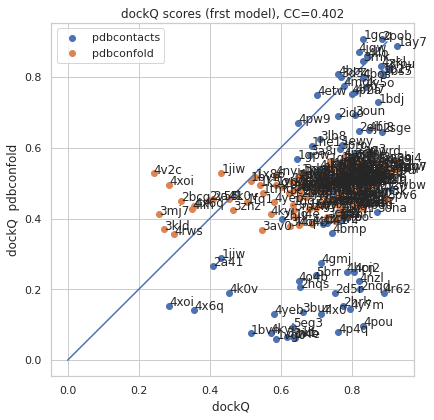

In [329]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbcontacts","pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts-new":continue
    df_merged = pd.merge(data_max["pdbcontacts-new"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

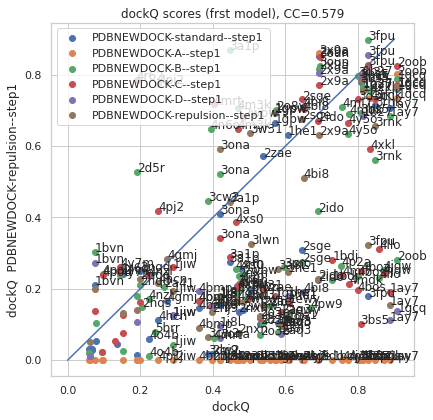

In [330]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDB'

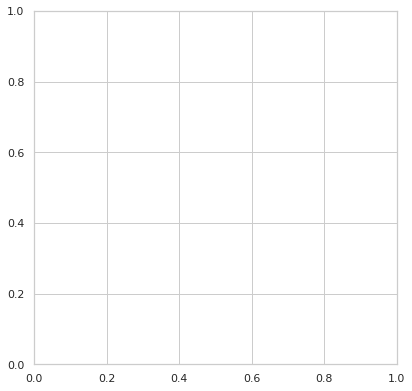

KeyError: 'PDB'

In [331]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["PDB"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ pdbcontacts")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDB'

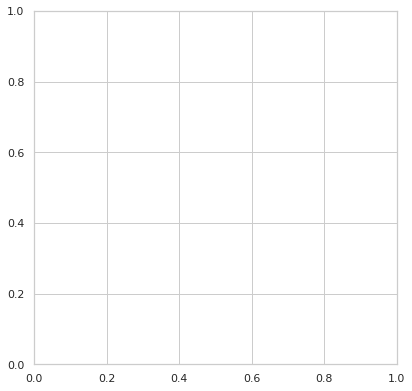

KeyError: 'PDB'

In [332]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ PDB")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

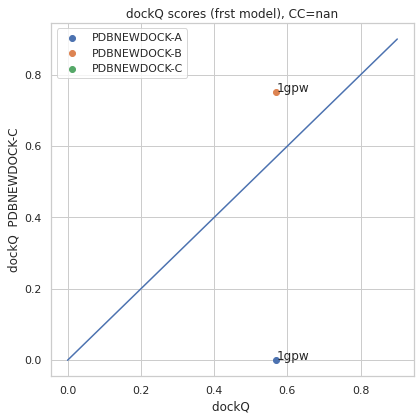

In [333]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

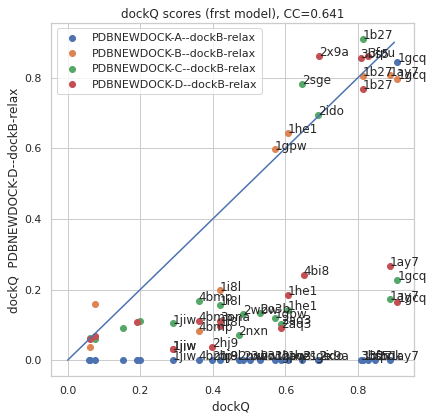

In [334]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

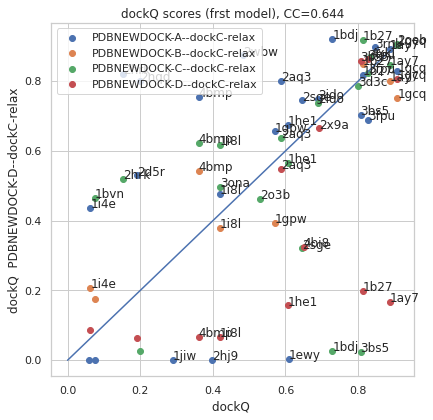

In [335]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

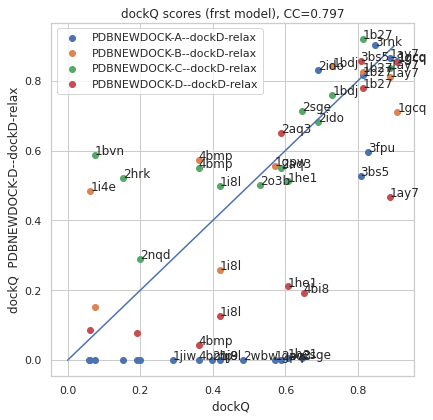

In [336]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

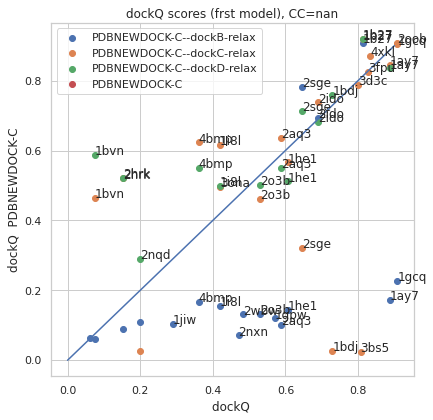

In [337]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C--dockD-relax')

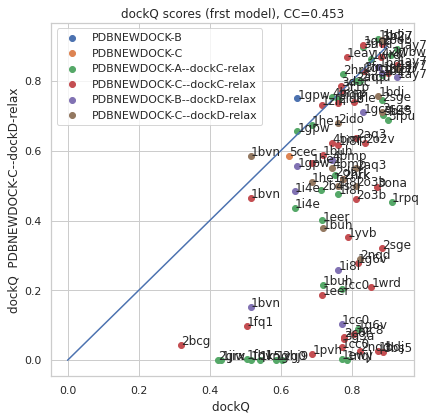

In [338]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts-new":continue
    df_merged = pd.merge(data_max["pdbcontacts-new"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDB'

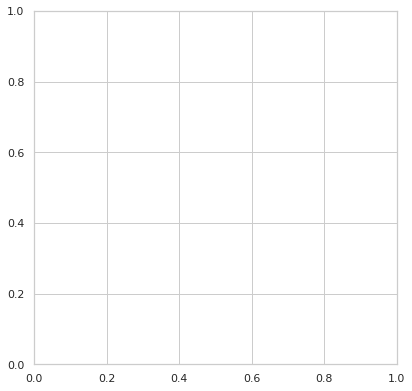

KeyError: 'PDB'

In [339]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion","pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    #if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [340]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard",
               "PDBNEWDOCK-repulsion","pdbconfold"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=smallset

In [341]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbconfold
pdbcontacts
pdbnewcontacts


IndexError: index out of bounds

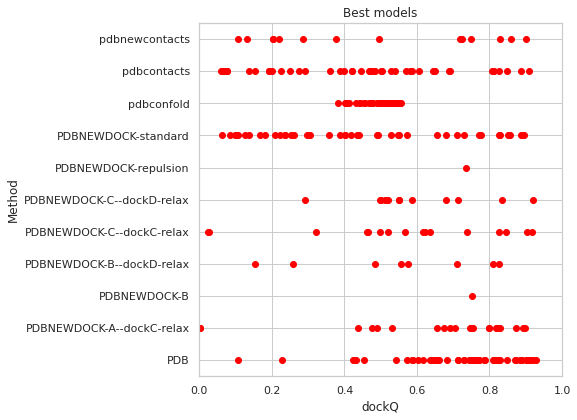

IndexError: index out of bounds

In [342]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [343]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [344]:
pdbset=[ 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]
codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '1jiw', '1k5g', '1nql', '1vg0', '2aq3', '2b4s', '2d5r', '2hj9',
       '2hrk', '2ido', '2nqd', '2nxn', '2o3b', '2sge', '2wbw', '2x9a',
       '2zae', '3a1p', '3a8i', '3bs5', '3cw2', '3fpu', '3lwn', '3ona',
       '3rnk', '3w31', '4bi8', '4bmp', '4gmj', '4hcn', '4xhu'],
      dtype=object)

Text(0, 0.5, 'dockQ  -N 3 --cpu 8')

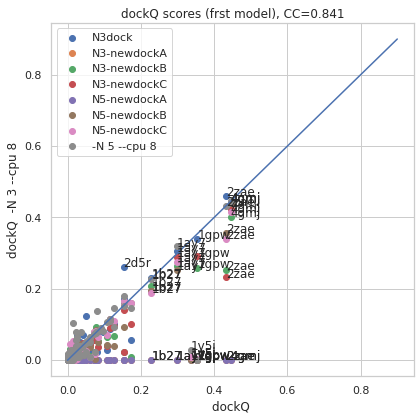

In [345]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="-N 3 --cpu 8":continue
    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

-N 3 --cpu 8 39
-N 5 --cpu 8 39
N3-newdockA 39
N3-newdockB 38
N3-newdockC 39
N3dock 39
N5-newdockA 39
N5-newdockB 39
N5-newdockC 39


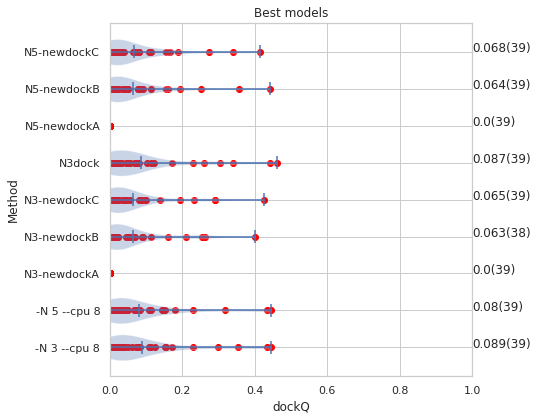

In [346]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    print (d,len(data[i]))
    i+=1
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [347]:
pdbset=sorted(["N1","N3"])

In [348]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0


In [349]:
all_df

,JHparams,code,name,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,-N 3 --cpu 8,1ay7,1ay7_u2_A-1ay7_u1_A,97,97,1060.0,2034.0,2034.0,1026.0,0.298,...,1ay7,-N 3 --cpu 8,0.828190,1759.5,0.84625,2034.0,0.81013,1485.0,53.985,187
1,-N 3 --cpu 8,1b27,1b27_u2_A-1b27_u1_A,109,109,733.0,2034.0,2034.0,656.0,0.229,...,1b27,-N 3 --cpu 8,0.824750,1759.0,0.85428,2034.0,0.79522,1484.0,49.025,199
2,-N 3 --cpu 8,1bvn,1bvn_u2_A-1bvn_u1_A,496,496,95.0,52623.0,52623.0,85.0,0.013,...,1bvn,-N 3 --cpu 8,0.619740,26373.0,0.70905,52623.0,0.53043,123.0,0.000,571
3,-N 3 --cpu 8,1gcq,1gcq_u2_A-1gcq_u1_A,66,66,1365.0,77704.0,77704.0,771.0,0.115,...,1gcq,-N 3 --cpu 8,0.555390,77600.5,0.63426,77704.0,0.52080,77497.0,71.760,123
4,-N 3 --cpu 8,1gpw,1gpw_u2_A-1gpw_u1_A,252,252,7137.0,67629.0,67629.0,5348.0,0.354,...,1gpw,-N 3 --cpu 8,0.889770,63047.5,0.89718,67629.0,0.88236,58466.0,130.000,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,N5-newdockC,4bi8,4bi8_u1_A-4bi8_u2_A,164,94,51.0,291.0,382.0,50.0,0.026,...,4bi8,N5-newdockC,0.695005,336.5,0.78100,382.0,0.60901,291.0,0.000,258
346,N5-newdockC,4bmp,4bmp_u1_A-4bmp_u2_A,301,118,4607.0,9429.0,15729.0,2901.0,0.004,...,4bmp,N5-newdockC,0.811060,12579.0,0.86858,15729.0,0.75354,9429.0,0.000,419
347,N5-newdockC,4gmj,4gmj_u2_A-4gmj_u1_A,253,253,1189.0,6344.0,6344.0,546.0,0.414,...,4gmj,N5-newdockC,0.831935,3998.5,0.85148,6344.0,0.82721,1653.0,139.104,489
348,N5-newdockC,4hcn,4hcn_u1_A-4hcn_u2_A,250,77,1.0,20.0,41925.0,1.0,0.014,...,4hcn,N5-newdockC,0.467315,20972.5,0.61756,41925.0,0.31707,20.0,0.000,327


In [350]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [351]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [352]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts","pdbconfold","PDB"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


IndexError: index out of bounds

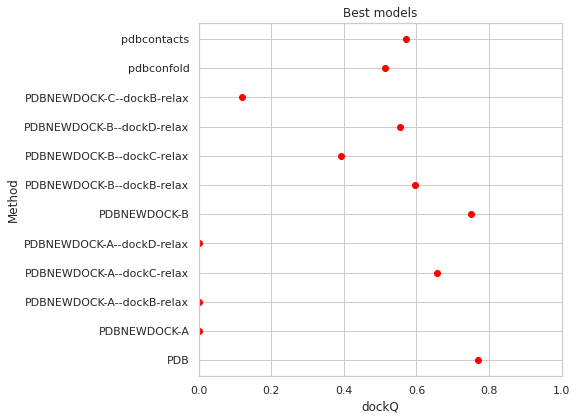

IndexError: index out of bounds

In [353]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [354]:
codes

array(['1gpw'], dtype=object)

In [355]:
all_df

,JHparams,code,name,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,PDB,1gpw,1gpw_u2_A-1gpw_u1_A,252,252,7137.0,58466.0,67629.0,5348.0,0.771,...,1gpw,PDB,0.983270,63047.5,0.98685,67629.0,0.97969,58466.0,0.0,456
1,PDBNEWDOCK-A,1gpw,1gpw_u1_A-1gpw_u2_A,252,204,0.0,0.0,0.0,0.0,0.000,...,1gpw,PDBNEWDOCK-A,0.983270,0.0,0.98685,0.0,0.97969,0.0,0.0,456
2,PDBNEWDOCK-A--dockB-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockB-relax,252,204,0.0,0.0,0.0,0.0,0.000,...,1gpw,PDBNEWDOCK-A--dockB-relax,0.974965,0.0,0.98284,0.0,0.96709,0.0,0.0,456
3,PDBNEWDOCK-A--dockC-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockC-relax,252,204,0.0,0.0,0.0,0.0,0.656,...,1gpw,PDBNEWDOCK-A--dockC-relax,0.931080,0.0,0.93904,0.0,0.92312,0.0,0.0,456
4,PDBNEWDOCK-A--dockD-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockD-relax,252,204,0.0,0.0,0.0,0.0,0.000,...,1gpw,PDBNEWDOCK-A--dockD-relax,0.973975,0.0,0.98386,0.0,0.96409,0.0,0.0,456
5,PDBNEWDOCK-B,1gpw,1gpw_u1_A-1gpw_u2_A,252,204,0.0,0.0,0.0,0.0,0.751,...,1gpw,PDBNEWDOCK-B,0.978420,0.0,0.98192,0.0,0.97492,0.0,0.0,456
6,PDBNEWDOCK-B--dockB-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockB-relax,252,204,0.0,0.0,0.0,0.0,0.597,...,1gpw,PDBNEWDOCK-B--dockB-relax,0.924950,0.0,0.95597,0.0,0.89393,0.0,0.0,456
7,PDBNEWDOCK-B--dockC-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockC-relax,252,204,0.0,0.0,0.0,0.0,0.393,...,1gpw,PDBNEWDOCK-B--dockC-relax,0.788815,0.0,0.90307,0.0,0.67456,0.0,0.0,456
8,PDBNEWDOCK-B--dockD-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockD-relax,252,204,0.0,0.0,0.0,0.0,0.556,...,1gpw,PDBNEWDOCK-B--dockD-relax,0.923665,0.0,0.96055,0.0,0.88678,0.0,0.0,456
9,PDBNEWDOCK-C--dockB-relax,1gpw,1gpw_u1_A-1gpw_u2_A.pdb-dockB-relax,252,204,0.0,0.0,0.0,0.0,0.120,...,1gpw,PDBNEWDOCK-C--dockB-relax,0.914640,0.0,0.94558,0.0,0.88370,0.0,0.0,456


IndexError: index out of bounds

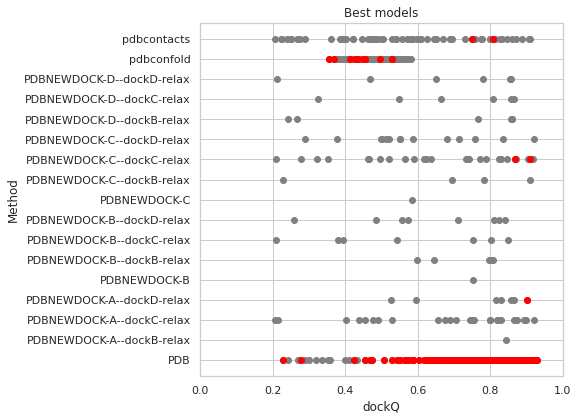

IndexError: index out of bounds

In [356]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


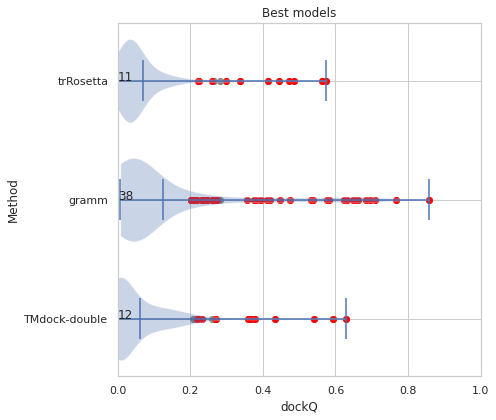

In [357]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [358]:
best_df

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,cdhit,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1012,gramm,3qc8,3qc8_u1_A-3qc8_u2_A,169,82,0.0,0.0,0.0,0.000,...,3qc8,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,251
1,1017,gramm,4emj,4emj_u1_A-4emj_u2_A,403,106,0.0,0.0,0.0,0.000,...,4emj,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,509
2,1007,gramm,3g3a,3g3a_u1_A-3g3a_u2_A,166,130,0.0,0.0,0.0,0.000,...,3g3a,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,296
3,1001,gramm,2hrk,2hrk_u1_A-2hrk_u2_A,181,121,0.0,0.0,0.0,0.000,...,2hrk,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,302
4,1021,gramm,4zfr,4zfr_u1_A-4zfr_u2_A,186,77,0.0,0.0,0.0,0.000,...,4zfr,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,947,TMdock-double,3l4q,3l4q_u1_A-3l4q_u2_A,164,122,0.0,0.0,0.0,0.098,...,3l4q,TMdock-double,0.5,0.0,1.0,0.0,0.0,0.0,0.000,286
57,1020,gramm,4nzl,4nzl_u1_A-4nzl_u2_A,219,100,0.0,0.0,0.0,0.000,...,4nzl,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,319
58,1010,gramm,3oj4,3oj4_u1_A-3oj4_u2_A,151,77,0.0,0.0,0.0,0.000,...,3oj4,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,228
59,996,gramm,1yvb,1yvb_u1_A-1yvb_u2_A,237,109,0.0,0.0,0.0,0.000,...,1yvb,gramm,1.0,0.0,1.0,0.0,1.0,0.0,0.000,346


In [359]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
      

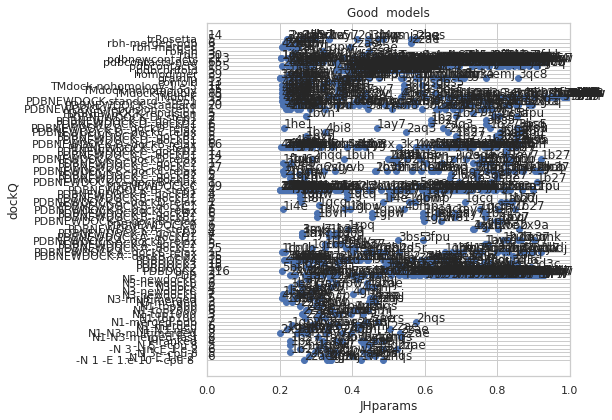

In [360]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

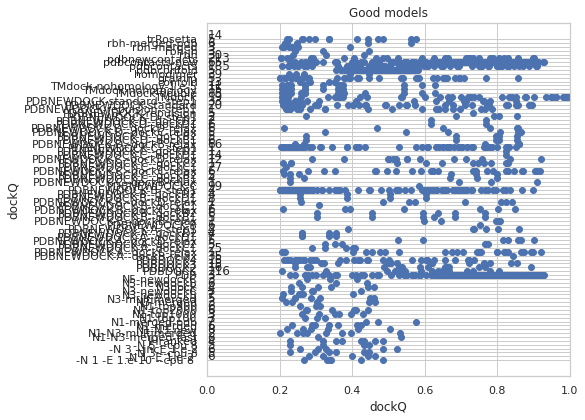

In [361]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

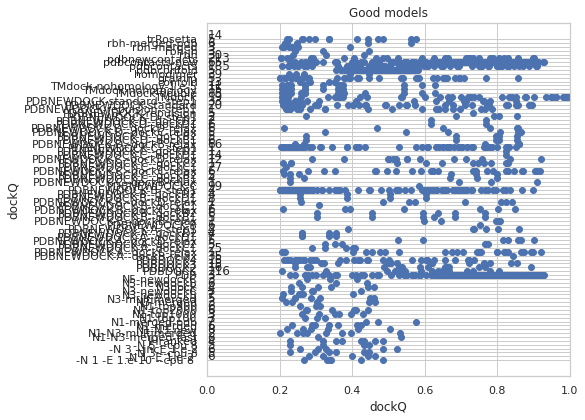

In [362]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [363]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [364]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2

,index,JHparams,code,name,lenA,lenB,msa,msaA,msaB,cdhit,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
9,8,-N 1 -E 1.e-2,2hrk,2hrk_u1_A-2hrk_u2_A,181,121,59.0,397.0,64.0,56.0,...,2hrk,-N 1 -E 1.e-2,0.677510,230.5,0.70198,397.0,0.65304,64.0,1.972,302
6,14,-N 3 --cpu 8,1v5i,1v5i_u2_A-1v5i_u1_A,276,276,1922.0,54177.0,54177.0,1646.0,...,1v5i,-N 3 --cpu 8,0.826270,33121.5,0.89294,54177.0,0.75960,12066.0,1.000,354
2,21,-N 3 --incE 1.e-2,4gmj,4gmj_u1_A-4gmj_u2_A,253,236,1189.0,6237.0,1654.0,514.0,...,4gmj,-N 3 --incE 1.e-2,0.835100,3945.5,0.86274,6237.0,0.80746,1654.0,132.090,489
5,28,JHranked,1gpw,1gpw_u2_A-1gpw_u1_A,252,252,7137.0,67629.0,58466.0,5343.0,...,1gpw,JHranked,0.889770,63047.5,0.89718,67629.0,0.88236,58466.0,179.000,456
1,35,N1-N3-merged-fast,2zae,2zae_u1_A-2zae_u2_A,107,93,1125.0,1659.0,1521.0,839.0,...,2zae,N1-N3-merged-fast,0.805695,1590.0,0.82914,1659.0,0.78225,1521.0,80.990,200
7,36,N1-N3-multimerged,1ay7,1ay7_u2_A-1ay7_u1_A,97,97,100.0,2034.0,2034.0,99.0,...,1ay7,N1-N3-multimerged,0.823980,1759.5,0.84058,2034.0,0.80738,1485.0,1.995,187
10,37,N1-N3-multimerged,1b27,1b27_u2_A-1b27_u1_A,109,109,100.0,2034.0,2034.0,99.0,...,1b27,N1-N3-multimerged,0.807610,1759.0,0.84948,2034.0,0.76574,1484.0,27.000,199
13,41,N1-N3-multimerged,2x9a,2x9a_u1_A-2x9a_u2_A,103,63,3.0,2604.0,18.0,3.0,...,2x9a,N1-N3-multimerged,0.522710,1311.0,0.66453,2604.0,0.38089,18.0,2.001,166
4,53,N1-merged,2o3b,2o3b_u2_A-2o3b_u1_A,240,240,456.0,5431.0,5431.0,301.0,...,2o3b,N1-merged,0.727490,2974.5,0.83406,5431.0,0.62495,518.0,29.008,384
8,56,N1-merged,4xhu,4xhu_u2_A-4xhu_u1_A,352,352,410.0,8381.0,8381.0,234.0,...,4xhu,N1-merged,0.829155,4344.0,0.84232,8381.0,0.81599,307.0,19.910,447


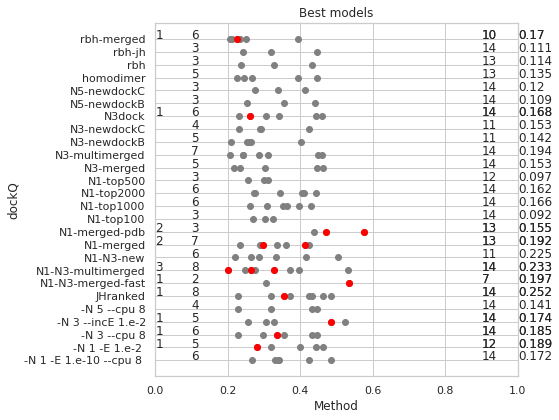

In [365]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [366]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
18884,3f1p_u1_A-3f1p_u2_A,TMdock,120,115,0,0,0,0,1,1,...,3f1p,TMdock,1.000000,0.0,1.00000,0.0,1.00000,0.0,166.911,235
18104,1qav_u1_A-1qav_u2_A,TMdock,113,88,0,0,0,0,1,1,...,1qav,TMdock,1.000000,0.0,1.00000,0.0,1.00000,0.0,0.96,201
18934,3g3a_u1_A-3g3a_u2_A,TMdock,166,130,0,0,0,0,1,1,...,3g3a,TMdock,1.000000,0.0,1.00000,0.0,1.00000,0.0,0,296
17804,1clv_u1_A-1clv_u2_A,TMdock,471,33,0,0,0,0,1,1,...,1clv,TMdock,1.000000,0.0,1.00000,0.0,1.00000,0.0,0,504
17825,1eay_u1_A-1eay_u2_A,TMdock,127,70,0,0,0,0,1,1,...,1eay,TMdock,1.000000,0.0,1.00000,0.0,1.00000,0.0,0,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,4x6q_u2_A-4x6q_u1_A,pdbconfold,265,339,0,0,0,0,0.435,0.698,...,4x6q,pdbconfold,0.680515,0.0,0.70229,0.0,0.65874,0.0,0,604
7672,4ilh_u2_A-4ilh_u1_A,pdbconfold,256,301,0,0,0,0,0.427,0.88,...,4ilh,pdbconfold,0.675775,0.0,0.67941,0.0,0.67214,0.0,0,557
7804,4rws_u2_A-4rws_u1_A,pdbconfold,72,434,0,0,0,0,0.356,0.79,...,4rws,pdbconfold,0.417545,0.0,0.50613,0.0,0.32896,0.0,0,506
8242,4ol0_u2_A-4ol0_u1_A,pdbcontacts-new,206,890,0,0,0,0,0.277,0.296,...,4ol0,pdbcontacts-new,0.940670,0.0,0.95950,0.0,0.92184,0.0,0,1096


In [367]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
name,,,,,,,,,,,,,,,,,,,,,
1ay7_u1_A-1ay7_u2_A,rbh-jh,97,90,1060.0,1490.0,2039.0,1026.0,0.328,0.361,4.628,...,1ay7,rbh-jh,0.830380,1764.5,0.84625,2039.0,0.81981,1490.0,53.985,187
1ay7_u2_A-1ay7_u1_A,homodimer,90,97,1060.0,2034.0,1485.0,989.0,0.280,0.333,4.614,...,1ay7,homodimer,0.823980,1759.5,0.84181,2034.0,0.81110,1485.0,43.992,187
1b27_u1_A-1b27_u2_A,homodimer,109,90,733.0,1484.0,2034.0,654.0,0.265,0.160,4.984,...,1b27,homodimer,0.825820,1759.0,0.85658,2034.0,0.79706,1484.0,49.025,199
1b27_u2_A-1b27_u1_A,homodimer,90,109,733.0,2034.0,1484.0,656.0,0.252,0.200,5.319,...,1b27,homodimer,0.810645,1759.0,0.85149,2034.0,0.78685,1484.0,46.020,199
1gpw_u1_A-1gpw_u2_A,rbh-merged,252,204,7146.0,80768.0,76000.0,5374.0,0.351,0.293,5.499,...,1gpw,rbh-merged,0.889680,78384.0,0.89390,80768.0,0.88822,76000.0,179.000,456
1gpw_u2_A-1gpw_u1_A,rbh-jh,204,252,7137.0,67629.0,58466.0,5343.0,0.354,0.333,5.614,...,1gpw,rbh-jh,0.894335,63047.5,0.89745,67629.0,0.89220,58466.0,169.000,456
1v5i_u1_A-1v5i_u2_A,-N 3 --cpu 8,276,78,1922.0,54177.0,12066.0,1642.0,0.336,0.191,3.748,...,1v5i,-N 3 --cpu 8,0.818890,33121.5,0.88557,54177.0,0.75221,12066.0,1.000,354
1vrs_u1_A-1vrs_u2_A,N1-top2000,124,117,836.0,100319.0,2803.0,806.0,0.472,0.449,2.953,...,1vrs,N1-top2000,0.989810,51561.0,0.99288,100319.0,0.98674,2803.0,53.988,241
1vrs_u2_A-1vrs_u1_A,N1-top2000,117,124,2091.0,2803.0,100319.0,1977.0,0.324,0.306,7.831,...,1vrs,N1-top2000,0.897465,51561.0,0.98730,100319.0,0.81427,2803.0,40.015,241


['gramm', 'pdbconfold', 'pdbcontacts-new', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2

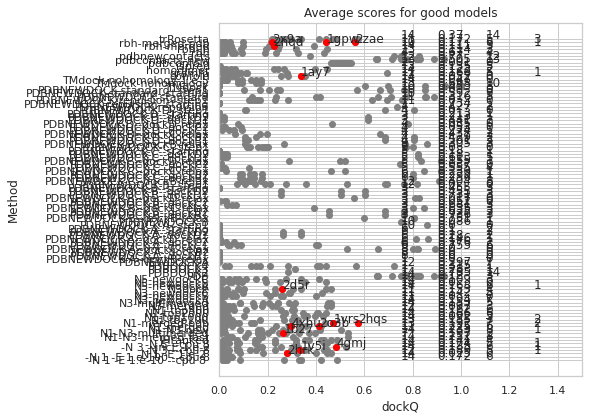

In [368]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [369]:
cutoff=0.1

In [370]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

cutoff=0.1

In [371]:
goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


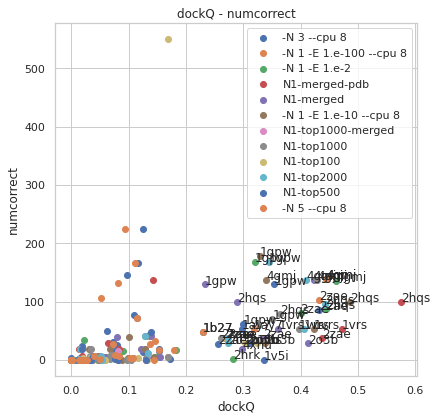

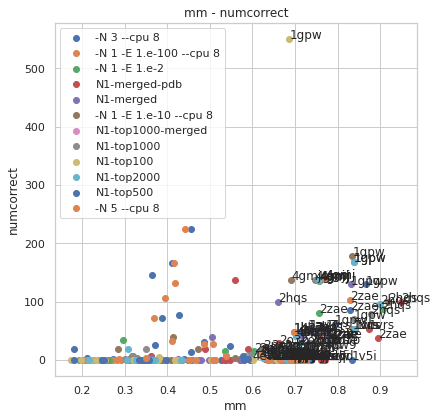

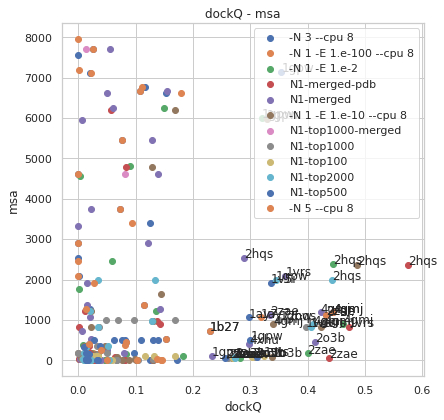

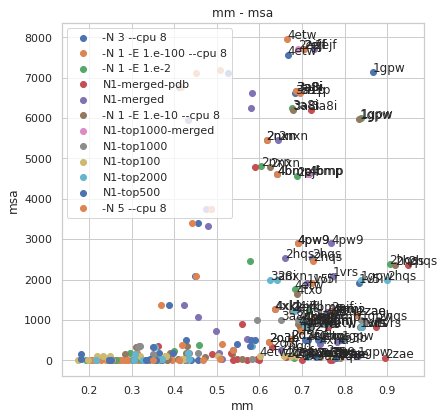

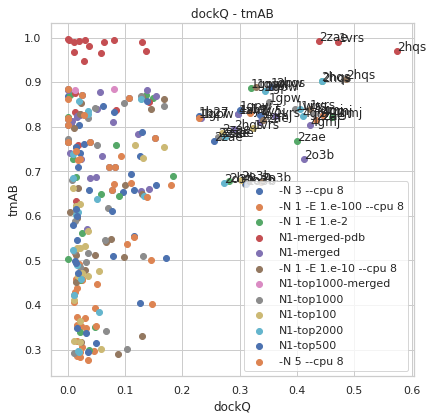

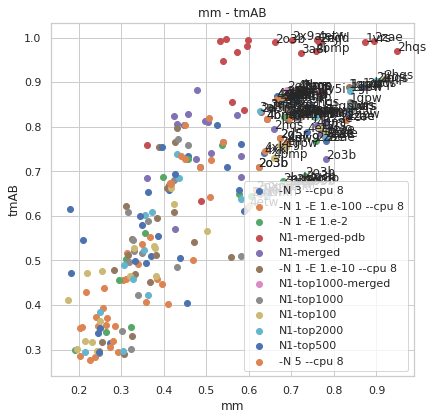

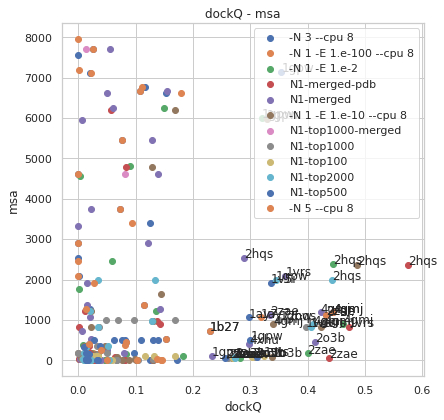

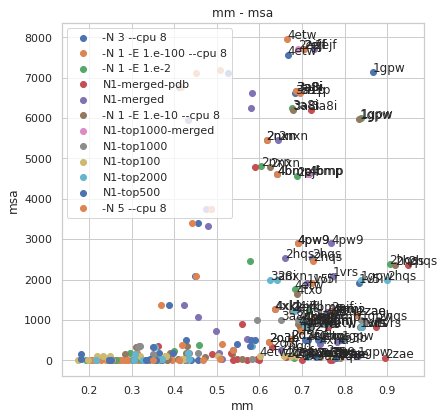

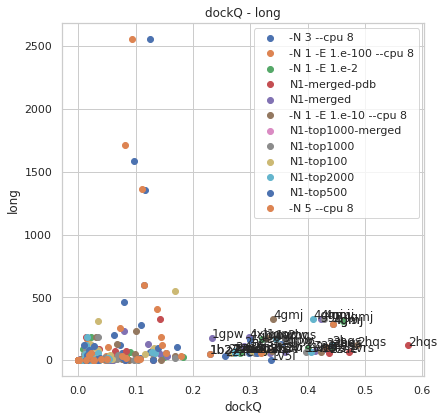

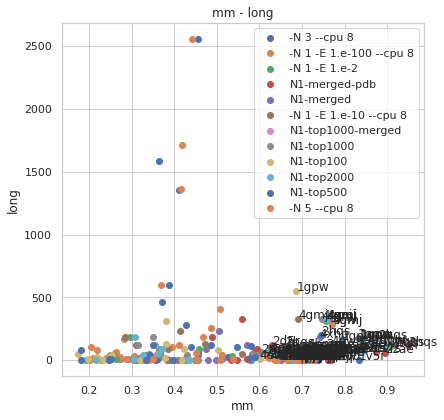

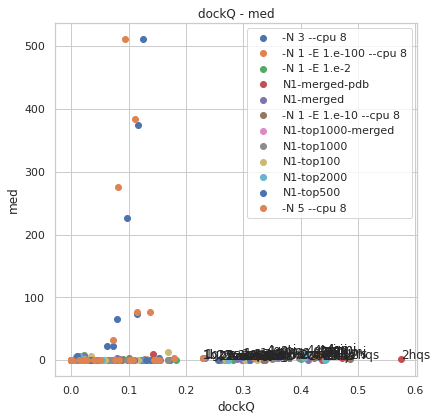

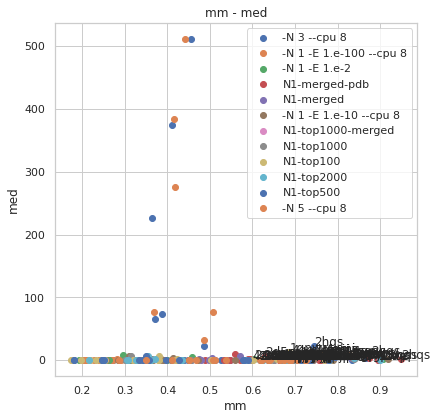

In [372]:
tempdf=df_max.loc[df_max.params.isin(JHsets)] 


tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]
cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}
for y in ["numcorrect","msa","tmAB","msa","long","med"]:
    for x in ["dockQ","mm","numcorrect"]:
        cutoff=cf[x]
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        for d in JHsets:
            xdata=tempdf.loc[tempdf.params==d][x]
            ydata=tempdf.loc[tempdf.params==d][y]
            plt.scatter(xdata,ydata,label=d)
            cc=np.corrcoef(xdata,ydata)
            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):
                sstr=txt[0:4]
                if (xdata[i]>cutoff):
                    ax.annotate(sstr, (xdata[i], ydata[i]))
        ax.set_title(x + " - " + y )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.legend()
    plt.close()

In [373]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts-new',
       'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax',

In [374]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '2hrk', '1ay7', '1b27', '1gcq',
       '1v5i', '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6',
       '5cra', '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '4etw'],
      dtype=object)

In [375]:
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
tempdf

name  lenA  lenB     msa     msaA  \
JHparams    code                                                               
PDB         1ay7  1ay7_u2_A-1ay7_u1_A.pdb-step1    97    97  1060.0   1485.0   
            1b27  1b27_u2_A-1b27_u1_A.pdb-step1   109   109   733.0   1484.0   
            1gpw            1gpw_u2_A-1gpw_u1_A   252   252  7137.0  58466.0   
            1v5i  1v5i_u2_A-1v5i_u1_A.pdb-step1   276   276     0.0      0.0   
            1vrs  1vrs_u2_A-1vrs_u1_A.pdb-step1   124   124     0.0      0.0   
...                                         ...   ...   ...     ...      ...   
pdbcontacts 2o3b            2o3b_u1_A-2o3b_u2_A   240   144   456.0   5431.0   
            2x9a            2x9a_u1_A-2x9a_u2_A   103    63     4.0   2604.0   
            2zae            2zae_u1_A-2zae_u2_A   107    93  1125.0   1659.0   
            4gmj            4gmj_u1_A-4gmj_u2_A   253   236  1189.0   6152.0   
            4xhu            4xhu_u2_A-4xhu_u1_A   352   352   410.0   8381.0   

                     msaB   cdhit  dockQ   fnat     iRMS  ...  CODE  \
JHparams    code                                          ...         
PDB         1ay7   2034.0   986.0  0.929  0.861  185.585  ...  1ay7   
            1b27   2034.0   654.0  0.919  0.800  204.850  ...  1b27   
            1gpw  67629.0  5348.0  0.771  0.733  479.285  ...  1gpw   
            1v5i      0.0     0.0  0.653  0.596  479.679  ...  1v5i   
            1vrs      0.0     0.0  0.832  0.755  206.013  ...  1vrs   
...                   ...     ...    ...    ...      ...  ...   ...   
pdbcontacts 2o3b    518.0   306.0  0.529  0.722    2.773  ...  2o3b   
            2x9a     18.0     4.0  0.692  0.750    0.814  ...  2x9a   
            2zae   1521.0   839.0  0.539  0.565    1.397  ...  2zae   
            4gmj   1646.0   523.0  0.275  0.488    2.149  ...  4gmj   
            4xhu   8381.0   240.0  0.467  0.519   10.946  ...  4xhu   

                       params      tmAB    msaAB  tmAB_max  msaAB_max  \
JHparams    code                                                        
PDB         1ay7          PDB  0.998225   1759.5   0.99846     2034.0   
            1b27          PDB  0.998015   1759.0   0.99893     2034.0   
            1gpw          PDB  0.983270  63047.5   0.98685    67629.0   
            1v5i          PDB  0.962600      0.0   0.97830        0.0   
            1vrs          PDB  0.975860      0.0   0.99533        0.0   
...                       ...       ...      ...       ...        ...   
pdbcontacts 2o3b  pdbcontacts  0.836740   2974.5   0.93597     5431.0   
            2x9a  pdbcontacts  0.911500   1311.0   0.98016     2604.0   
            2zae  pdbcontacts  0.860355   1590.0   0.93809     1659.0   
            4gmj  pdbcontacts  0.720295   3899.0   0.72888     6152.0   
            4xhu  pdbcontacts  0.873565   4344.0   0.92326     8381.0   

                  tmAB_min  msaAB_min  numcorrect  len  
JHparams    code                                        
PDB         1ay7   0.99799     1485.0         0.0  187  
            1b27   0.99710     1484.0         0.0  199  
            1gpw   0.97969    58466.0         0.0  456  
            1v5i   0.94690        0.0         0.0  354  
            1vrs   0.96808        0.0         0.0  241  
...                    ...        ...         ...  ...  
pdbcontacts 2o3b   0.73751      518.0         0.0  384  
            2x9a   0.84284       18.0         0.0  166  
            2zae   0.78262     1521.0         0.0  200  
            4gmj   0.71171     1646.0         0.0  489  
            4xhu   0.85175      307.0         0.0  447  

[97 rows x 51 columns]

In [376]:
df_max.loc[df_max.params=="N3-multimerged"]["dockQ"]

JHparams        code
N3-multimerged  1ay7    0.287
                1b27    0.242
                1bdj    0.050
                1buh    0.023
                1bvn    0.012
                        ...  
                4xs0    0.083
                4y5o    0.036
                4y7m    0.024
                4yeb    0.040
                4yoc    0.025
Name: dockQ, Length: 118, dtype: float64

-N 3 --cpu 8
N1-N3-merged-fast
N1-N3-multimerged
N1-N3-new
N1-merged
N1-merged-pdb
N1-top1000
N3-merged
N3-multimerged


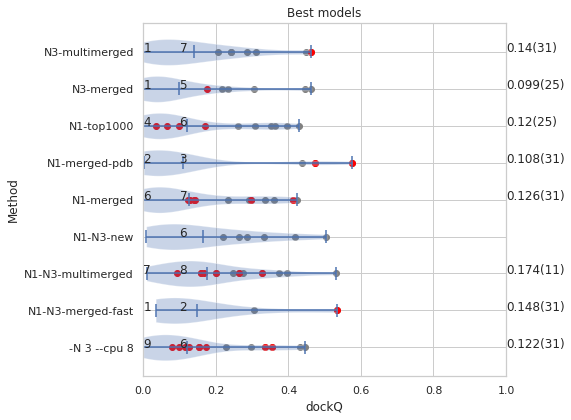

In [377]:
pdbset=['-N 3 --cpu 8',  'N1-top1000',
        'N1-merged','N1-merged-pdb','N3-merged',"N3-multimerged",
        "N1-N3-multimerged","N1-N3-merged-fast","N1-N3-new"]
cutoff=0.2
codes=goodmodels
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
#tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['CODE']).reset_index()
best_df.sort_values("params")

#good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
good_df=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))&(df_max.dockQ>cutoff )].reset_index()

plt.scatter(good_df.dockQ,good_df.params,color="grey")
plt.scatter(best_df.dockQ,best_df.params,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.params==best_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[best_df.params[i]]==0:
        done[best_df.params[i]]=1
        ax.annotate(str(numhit),(.0, best_df.params[i]))
        ax.annotate(str(round(average[best_df.params[i]],3))+"("+str(length[good_df.params[i]])+")"
                    ,(1.0, best_df.params[i]))
for d in pdbset:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.params[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[good_df.params[i]]==0:
        done[good_df.params[i]]=1
        ax.annotate(str(numhit),(.1, good_df.params[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [378]:
data_dirst


NameError: name 'data_dirst' is not defined

-N 3 --cpu 8
Empty DataFrame
Columns: [name_x, JHparams_x, lenA_x, lenB_x, msa_x, msaA_x, msaB_x, cdhit_x, dockQ_x, fnat_x, iRMS_x, LRMS_x, fnonnat_x, mm_x, tmA_x, tmB_x, long_x, med_x, longPPV_x, medPPV_x, longA_x, medA_x, longPPVA_x, medPPVA_x, longB_x, medB_x, longPPVB_x, medPPVB_x, short_x, shortPPV_x, shortA_x, shortPPVA_x, shortB_x, shortPPVB_x, shortpdb_x, medpdb_x, longpdb_x, avprob_x, auc_x, evalue_x, seqid_x, rank_x, code_x, params_x, tmAB_x, msaAB_x, tmAB_max_x, msaAB_max_x, tmAB_min_x, msaAB_min_x, numcorrect_x, len_x, name_y, JHparams_y, lenA_y, lenB_y, msa_y, msaA_y, msaB_y, cdhit_y, dockQ_y, fnat_y, iRMS_y, LRMS_y, fnonnat_y, mm_y, tmA_y, tmB_y, long_y, med_y, longPPV_y, medPPV_y, longA_y, medA_y, longPPVA_y, medPPVA_y, longB_y, medB_y, longPPVB_y, medPPVB_y, short_y, shortPPV_y, shortA_y, shortPPVA_y, shortB_y, shortPPVB_y, shortpdb_y, medpdb_y, longpdb_y, avprob_y, auc_y, evalue_y, seqid_y, rank_y, code_y, CODE, params_y, tmAB_y, msaAB_y, tmAB_max_y, ...]
Index: []

[0

Text(0, 0.5, 'dockQ')

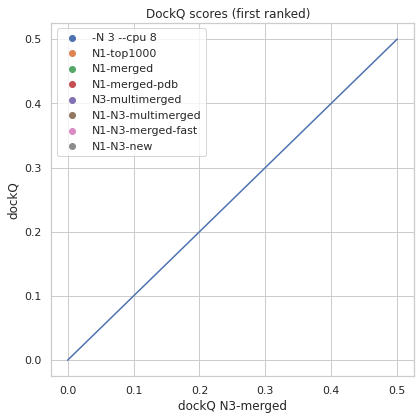

In [379]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
baseset="N3-merged"
for d in pdbset:
  
    if d==baseset:continue   
    print (d)
    df_merged = pd.merge(data_first[baseset],data_first[d], on=['CODE'],how="inner")
    print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.5]
y=[0,0.5]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+baseset)
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ')

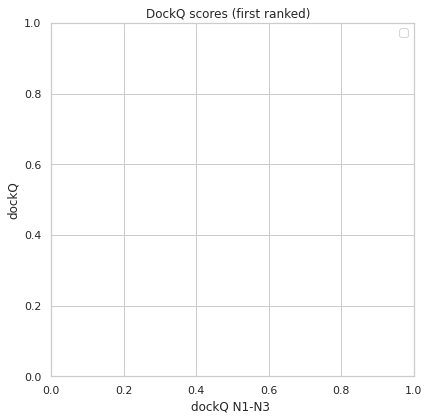

In [380]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in JHsets:
  
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
#x=[0,0.3]
#y=[0,0.3]
#plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ N1-N3 ")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [381]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '2hrk', '1ay7', '1b27', '1gcq',
       '1v5i', '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6',
       '5cra', '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '4etw'],
      dtype=object)

In [382]:
JHsets

['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [383]:
JHsets1=['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ']

In [384]:
JHsets2=[
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [385]:
JHsets=['-N 3 --cpu 8',
 '-N 1 -E 1.e-2 --cpu 8',
 '-N 1 -E 1.e-10 --cpu 8 ',
 '-N 5 --cpu 8']
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()


In [386]:
train_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
test_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()

In [387]:
good_df=df_first.loc[(df_first.code.isin(goodmodels)&(df_first.JHparams.isin(JHsets)))].reset_index()

In [388]:
good_df=df_first.loc[(df_first.JHparams.isin(JHsets))].reset_index()

In [389]:
good_df

,index,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len


In [390]:
cutoff

0.2

In [391]:
ydata=good_df.dockQ
cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]

#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]


reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [392]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 0.08541812425663518
Coefficients: 
 [-1.40111252e-03  2.77820282e-04  7.21635594e-06]


In [393]:

for s in JHsets:
    set_df=good_df.loc[good_df.params==s]
    ypred=set_df["dockQ"].to_list()
    (i,j,dockq,mm)=get_ranks(set_df,ypred)
    print (s,i,j,dockq,mm)

-N 3 --cpu 8 0 0 0 0
-N 1 -E 1.e-2 --cpu 8 0 0 0 0
-N 1 -E 1.e-10 --cpu 8  0 0 0 0
-N 5 --cpu 8 0 0 0 0


In [394]:
xdata=good_df[cols]
ydata=good_df.dockQ

ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [395]:
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()
good_df

,index,name,JHparams,lenA,lenB,msa,msaA,msaB,cdhit,dockQ,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len


In [396]:
# Now we try all combinations - no plots
set1_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
set2_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()

cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
ydata=good_df.dockQ

res={}
maxvalue=0
for c in cols:
    xdata=good_df[[c]]
    reg.fit(xdata,ydata)
    ypred = reg.predict(xdata)
    print (c,round(np.corrcoef(ydata,ypred)[0,1],3))
    res[c]=np.corrcoef(ydata,ypred)[0,1]
    maxvalue=max(res[c],maxvalue)    
for c in cols:
    for d in cols:
        xdata=good_df[[c,d]]
        reg.fit(xdata,ydata)
        ypred = reg.predict(xdata)
        #print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        res[c+d]=np.corrcoef(ydata,ypred)[0,1]
        #if (res[c+d]-maxvalue>0.0):
        #    print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        (i,j,k,l)=get_ranks(good_df,ypred)
        print (c,d,i,j,k,l)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [397]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 0.08541812425663518
Coefficients: 
 [-1.40111252e-03  2.77820282e-04  7.21635594e-06]


In [398]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
#cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [399]:
newdf=df.loc[df.JHparams=="trRosetta"]
plt.scatter(newdf.csv,newdf.)

SyntaxError: invalid syntax (<ipython-input-399-1bbe5c8e123e>, line 2)

In [400]:
newdf[["CODE","dockQ","csv","tmAB","long"]].sort_values("csv")

KeyError: "['csv'] not in index"

In [401]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']


Text(0.5, 0, 'cdhit')

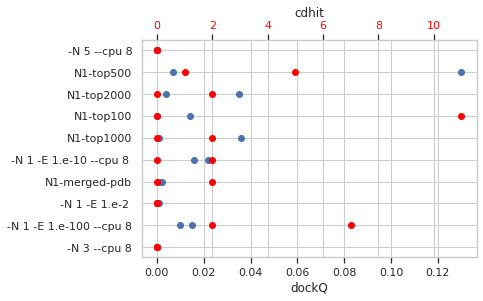

In [402]:
newdf=df.loc[(df.CODE=="4etw")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

Text(0.5, 0, 'cdhit')

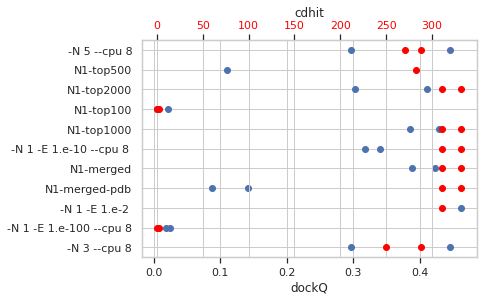

In [403]:
newdf=df.loc[(df.CODE=="4gmj")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

# bes models to test 2zae 4gmj
# Bad model 4etw

In [404]:
df_max.loc[(df_max.params=="trRosetta") & (df_max.dockQ==0)]

name  lenA  lenB     msa      msaA      msaB  \
JHparams  code                                                                
trRosetta 3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0   35975.0   35975.0   
          3l1z  3l1z_u2_A-3l1z_u1_A   153   153  1390.0  136672.0  136672.0   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   55937.0   55937.0   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  354953.0  354953.0   

                 cdhit  dockQ  fnat     iRMS  ...  CODE     params      tmAB  \
JHparams  code                                ...                              
trRosetta 3fap   573.0    0.0   0.0  187.525  ...  3fap  trRosetta  0.840125   
          3l1z   830.0    0.0   0.0  261.906  ...  3l1z  trRosetta  0.776680   
          3rj3   247.0    0.0   0.0  515.213  ...  3rj3  trRosetta  0.635370   
          4emj  5681.0    0.0   0.0  687.538  ...  4emj  trRosetta  0.884110   

                   msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams  code                                                       
trRosetta 3fap   18731.0   0.87845    35975.0   0.80207     1489.0   
          3l1z   87194.0   0.83424   136672.0   0.72778    37864.0   
          3rj3   39722.5   0.80210    55937.0   0.48427    23508.0   
          4emj  195361.5   0.90839   354953.0   0.86736    35929.0   

                numcorrect  len  
JHparams  code                   
trRosetta 3fap         0.0  201  
          3l1z         0.0  239  
          3rj3         0.0  421  
          4emj         0.0  509  

[4 rows x 51 columns]